### 한국 방문객 데이터셋

이 데이터 세트는 한국에 입국한 외국인 방문객을 대상으로 합니다.
외국인(한국인 아님), 재외동포, 승무원을 포함하되, 관광객으로 간주되지 않는 일부 외국인(외교관, 군인, 영주권자, 방문동거, 거주)을 제외합니다.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
df1=pd.read_csv("csv/archive/Enter_korea_by_purpose.csv")
df2=pd.read_csv("csv/archive/Enter_korea_by_age.csv")
df3=pd.read_csv("csv/archive/Enter_korea_by_gender.csv")

In [197]:
df1.info(),df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   tourism           960 non-null    int64  
 6   business          960 non-null    int64  
 7   official affairs  960 non-null    int64  
 8   studying          960 non-null    int64  
 9   others            960 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 75.1+ KB


(None,
 date                0
 nation              0
 visitor             0
 growth              0
 share               0
 tourism             0
 business            0
 official affairs    0
 studying            0
 others              0
 dtype: int64)

In [198]:
df2.info(),df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      960 non-null    object 
 1   nation    960 non-null    object 
 2   visitor   960 non-null    int64  
 3   growth    960 non-null    float64
 4   share     960 non-null    float64
 5   age0-20   960 non-null    int64  
 6   age21-30  960 non-null    int64  
 7   age31-40  960 non-null    int64  
 8   age41-50  960 non-null    int64  
 9   age51-60  960 non-null    int64  
 10  age61     960 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 82.6+ KB


(None,
 date        0
 nation      0
 visitor     0
 growth      0
 share       0
 age0-20     0
 age21-30    0
 age31-40    0
 age41-50    0
 age51-60    0
 age61       0
 dtype: int64)

In [199]:
df3.info(),df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     960 non-null    object 
 1   nation   960 non-null    object 
 2   visitor  960 non-null    int64  
 3   growth   960 non-null    float64
 4   share    960 non-null    float64
 5   male     960 non-null    int64  
 6   female   960 non-null    int64  
 7   crewman  960 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 60.1+ KB


(None,
 date       0
 nation     0
 visitor    0
 growth     0
 share      0
 male       0
 female     0
 crewman    0
 dtype: int64)

* 결측치 없음

In [310]:
print(df1.shape,df2.shape,df3.shape)
df1.nation.unique(),len(df1.nation.unique())

(960, 10) (960, 11) (960, 8)


(array(['China', 'Japan', 'Taiwan', 'Hong Kong', 'Macao', 'Phillipines',
        'Indonesia', 'Thailand', 'Vietnam', 'India', 'Malaysia',
        'Singapore', 'Mongolia', 'Uzbekistan', 'Myanmar', '*GCC',
        'Kazakhstan', 'Turkey', 'Cambodia', 'Sri Lanka', 'Bangladesh',
        'Pakistan', 'Israel', 'Iran', 'Asia others', 'USA', 'Canada',
        'Brazil', 'Mexico', 'America others', 'Russia', 'UK', 'Germany',
        'France', 'Italy', 'Netherland', 'Ukraine', 'Spain', 'Romania',
        'Norway', 'Sweden', 'Poland', 'Swiss', 'Portugal', 'Austria',
        'Finland', 'Belgium', 'Croatia', 'Greece', 'Bulgaria', 'Denmark',
        'Ireland', 'Europe others', 'Austrailia', 'New Zealand',
        'Oceania others', 'South Africa', 'Africa others', 'Stateless',
        'Overseas Korean'], dtype=object),
 60)

* 60개 국가 960개의 인덱스
    * 국가별 정리가 제대로 되어있지 않음을 알 수 있습니다

### 방문 목적

In [200]:
# 국가 기준 그룹화 하여 정렬
df_purpose=df1.set_index('nation')
df_purpose=df_purpose.loc[:,'tourism':'others']
df_purpose['sum']=df_purpose['tourism']+df_purpose['business']+df_purpose['official affairs']+df_purpose['studying']+df_purpose['others']
df_purpose.groupby('nation').sum().sort_values('sum',ascending=False)[:10] # 상위 10개국만 표시

,tourism,business,official affairs,studying,others,sum
nation,,,,,,
China,5341847,47709,5067,277895,956800,6629318
Japan,3585819,28194,2264,16333,62971,3695581
Taiwan,1399668,1154,221,5662,17924,1424629
USA,885065,5449,41533,6396,232276,1170719
Hong Kong,766312,765,52,3286,12744,783159
Thailand,542276,749,4189,2181,95128,644523
Vietnam,420452,14280,4382,65316,120491,624921
Phillipines,315298,2380,2195,1853,238844,560570
Malaysia,413728,1677,86,3221,37010,455722


* 대부분 외국인의 주된 방문 목적은 여행
    * 중국이 가장 많은 방문객 비율을 차지하고 있고, 뒤를 이어 일본, 대만이 뒤를 따릅니다.

### 연령대

In [201]:
# 국가 기준 그룹화 하여 정렬
df_age=df2.set_index('nation')
df_age=df_age.loc[:,'age0-20':'age61']
df_age['sum']=df_age['age0-20']+df_age['age21-30']+df_age['age31-40']+df_age['age41-50']+df_age['age51-60']+df_age['age61']
df_age.groupby('nation').sum().sort_values("sum",ascending=False)[:10] # 상위 10개국만 표시

,age0-20,age21-30,age31-40,age41-50,age51-60,age61,sum
nation,,,,,,,
China,423696,1894302,1835184,864272,760557,675872,6453883
Japan,426179,1079631,571123,638839,550992,393140,3659904
Taiwan,205193,310609,324283,275737,173153,123098,1412073
USA,142704,189609,189678,180639,197195,187620,1087445
Hong Kong,108546,164546,143710,145289,129163,80922,772176
Thailand,53806,171154,160580,91418,56395,34592,567945
Vietnam,70572,164468,142793,82006,62232,31306,553377
Malaysia,64943,113207,92206,67278,53381,32324,423339
Phillipines,39038,89085,92970,63627,40526,24281,349527


* 20대부터 40대까지의 연령대가 가장 많이 한국을 방문하는 경향을 볼 수 있습니다. 

    1. 여행 성향: 20대부터 40대는 여행에 대한 관심이 높을 수 있습니다. 이 연령대는 경제적으로 독립적이며 자유롭게 여행할 수 있는 시기입니다. 새로운 경험을 추구하고 탐험하는  성향이 있을 수 있어 다른 나라를 방문하고 문화를 체험하는 것에 관심이 많을 수 있습니다.

    2. 경제력: 20대부터 40대는 경제적으로 안정된 시기일 가능성이 큽니다. 경제적으로 더 많은 자유와 여행에 투자할 수 있는 자금이 있을 수 있으며, 이를 통해 해외 여행을 즐길 수 있습니다.

    3. 인터넷과 소셜미디어: 20대부터 40대는 인터넷과 소셜미디어를 적극적으로 활용하는 세대입니다. 정보 접근성이 높고 여행 관련 정보를 쉽게 얻을 수 있습니다. 다양한 여행 블로그, 소셜미디어 플랫폼, 여행 추천 사이트 등을 통해 다른 사람들의 여행 경험을 공유받고, 관심있는 목적지에 대한 정보를 얻을 수 있습니다. 이러한 정보의 확산은 여행 관심을 자극할 수 있습니다.

    4. 문화적 호기심: 20대부터 40대는 다양한 문화와 경험에 대한 호기심이 높을 수 있습니다. 한국은 독특한 문화, 역사, 음식 등을 제공하며, 이러한 다양성을 경험하고자 하는 여행자에게 매력적인 목적지일 수 있습니다.

    5. K-팝과 한류 문화: 한류 열풍이 전 세계적으로 퍼지면서 한국은 K-팝, 드라마, 영화 등을 통해 많은 사람들의 관심을 받게 되었습니다. 20대부터 40대는 K-팝과 한류 문화에 흥미를 가지고 있을 수 있으며, 한국을 직접 방문하여 그들이 사랑하는 아티스트와 문화를 경험하고자 할 것입니다.

### 성별

In [202]:
# 국가 기준 그룹화 하여 정렬
df_gender=df3.set_index('nation')
df_gender=df_gender.loc[:,'male':'female']
df_gender['sum']=df_gender['male']+df_gender['female']
df_gender.groupby('nation').sum().sort_values('sum',ascending=False)[:10] # 상위 10개국만 표시

,male,female,sum
nation,,,
China,2478590,3975293,6453883
Japan,1268356,2391548,3659904
Taiwan,469668,942405,1412073
USA,587328,500117,1087445
Hong Kong,267098,505078,772176
Thailand,190372,377573,567945
Vietnam,261871,291506,553377
Malaysia,169443,253896,423339
Phillipines,173666,175861,349527


In [203]:
df_gender.sum()

male       7602632
female    10774092
sum       18376724
dtype: int64

* 여성 방문객이 남성 방문객의 1.3배가량 많다는 것을 관찰할 수 있습니다.

    1. 여행 성향 및 관심사: 여성들은 다양한 문화, 음식, 쇼핑 등을 경험하고 탐험하는 것을 즐기는 경우가 많습니다. 여행을 통해 새로운 경험을 찾고자 하는 성향이 강할 수 있습니다. 이러한 여행 성향과 관심사는 한국을 방문하는 여성 방문객 수의 상대적인 증가와 관련이 있을 수 있습니다.

    2. 한류 열풍: 한류 열풍은 전 세계적으로 큰 인기를 얻고 있으며, 여성들 사이에서 특히 인기가 높습니다. 한국의 음악, 드라마, 영화 등은 여성들 사이에서 큰 관심을 받으며, 이를 경험하기 위해 한국을 방문하는 경우가 많을 수 있습니다.

    3. 건강 및 뷰티 관심: 한국은 건강, 뷰티, 스킨케어 등에 대한 전문성과 다양한 제품을 제공하는 명성을 갖고 있습니다. 한국을 방문하여 뷰티 및 건강에 관련된 서비스, 제품, 트리트먼트 등을 받으려는 여성 방문객들의 수가 증가할 수 있습니다.

    4. 친구 또는 가족과의 여행: 여성들은 종종 친구 또는 가족과 함께 여행을 즐기는 경우가 많습니다. 한국은 안전하고 다양한 여행 명소와 활동을 제공하며, 이러한 조건이 여성들이 함께 여행하는 데 영향을 줄 수 있습니다.

### 시각화

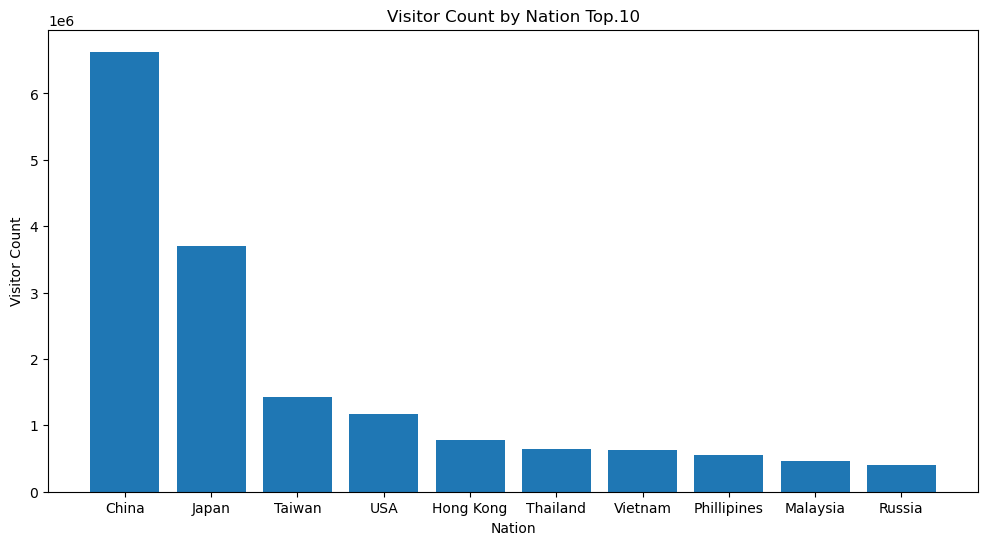

In [204]:
# 바 그래프 (국가별 방문객 비율)
data=df1.groupby('nation').sum().sort_values('visitor',ascending=False).reset_index()[:10]

plt.figure(figsize=(12, 6))
plt.bar(data['nation'], data['visitor'])
plt.xlabel('Nation')
plt.ylabel('Visitor Count')
plt.title('Visitor Count by Nation Top.10')
plt.xticks(rotation=0)
plt.show()

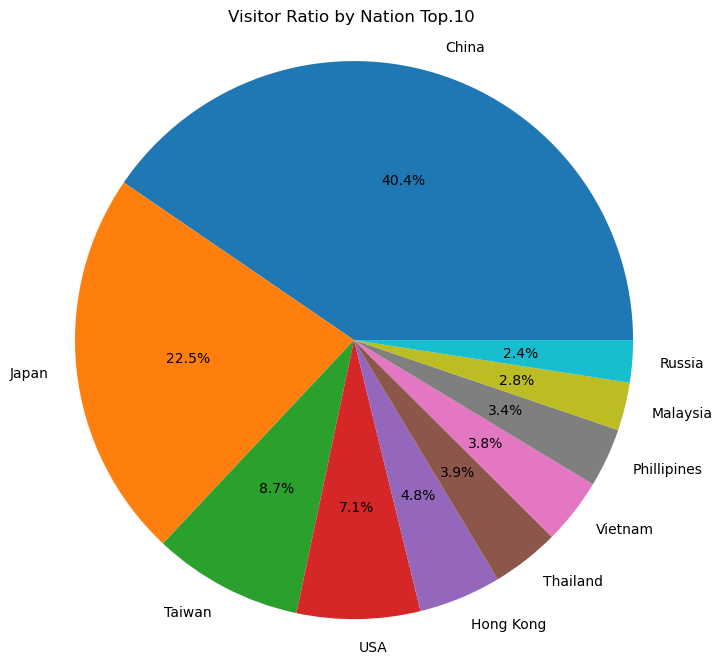

In [205]:
# 원 그래프 (국가별 방문객 비율)
data=df1.groupby('nation').sum().sort_values('visitor',ascending=False).reset_index()[:10]

plt.figure(figsize=(8, 8))
plt.pie(data['visitor'], labels=data['nation'], autopct='%1.1f%%')
plt.title('Visitor Ratio by Nation Top.10')
plt.axis('equal')
plt.show()

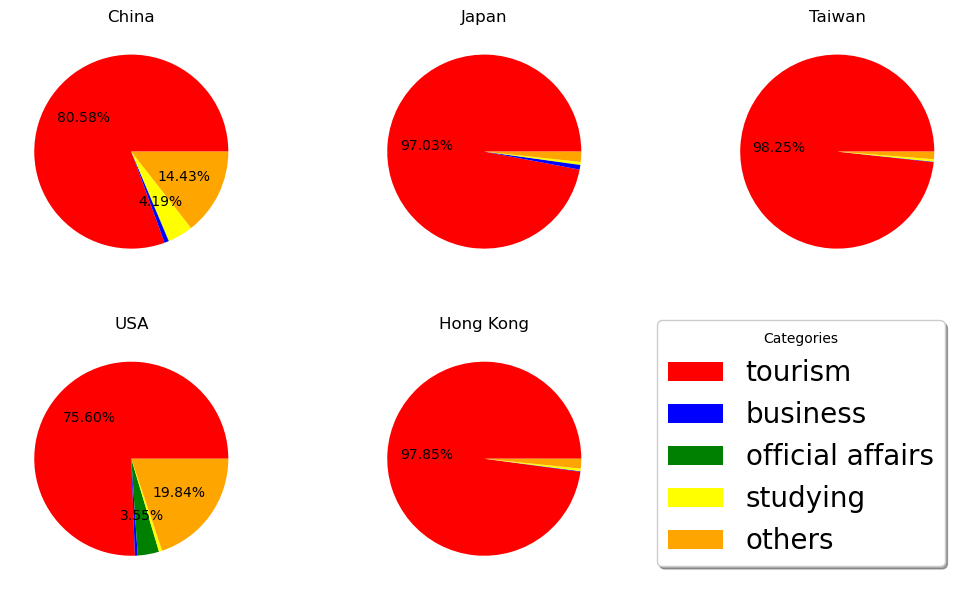

In [304]:
#원 그래프 (국가별 방문 목적)
data=df_purpose.groupby('nation').sum().sort_values('sum',ascending=False)[:10].reset_index()

labels = ['tourism', 'business', 'official affairs', 'studying', 'others']
colors = ['red', 'blue', 'green', 'yellow', 'orange']

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# 3% 미만의 비율은 수치를 표기하지 않음
def custom_autopct(pct):
    if pct<3.0:
        return
    return '%.2f%%' % pct

# 유효한 원 그래프 5개
i=0
for j in range(2):
    for k in range(3):
        if i==5 : continue
        axes[j][k].pie([data.iloc[i]['tourism'],
                        data.iloc[i]['business'],
                        data.iloc[i]['official affairs'],
                        data.iloc[i]['studying'],
                        data.iloc[i]['others']], 
                        colors=colors, autopct=custom_autopct)
        axes[j][k].set_title(data['nation'][i])
        i+=1

# 보이지 않는 원 그래프
axes[-1][-1].pie([20,20,20,20,20], labels=labels, colors=colors,radius=0.5)
axes[-1][-1].set_title('')
plt.legend(loc='lower right', title='Categories', shadow=True, frameon=True, fontsize=20)

plt.tight_layout()
plt.show()



### 정리 
* 위 데이터셋에 따르면 한국을 방문한 외국인 관광객들의 특성과 선호도는 다음과 같이 정리할 수 있습니다

    * 국적: 중국인 방문객이 가장 많으며, 이어서 일본인과 대만인이 높은 비율을 차지합니다. 이는 한국과 인접한 지역이며, 경제 및 문화적인 교류가 활발한 이웃 국가들과의 관광객 교류가 큰 영향을 미치고 있음을 보여줍니다.

    * 연령대: 20~40대가 방문한 외국인 관광객의 가장 큰 그룹입니다. 이 연령대는 일반적으로 여행 및 관광에 관심이 많고 경제적으로 활동적인 층으로 알려져 있습니다. 따라서 한국은 이 연령대의 관광 수요를 충족시키기 위한 다양한 프로그램과 활동을 제공할 수 있습니다.

    * 성별: 여성 관광객의 비율이 남성 관광객보다 높습니다. 여성들이 관광 및 여행에 더 많은 관심을 가지고 있고, 안전 및 편의에 더 큰 중요성을 두기 때문일 수 있습니다. 이를 고려하여 한국은 여성 관광객을 위한 안전한 환경 및 다양한 여성 친화적인 프로그램을 제공함으로써 관광 수요를 유치할 수 있습니다.

* 위 결과를 종합해보면, 한국은 중국, 일본, 대만 등의 국적을 가진 20~40대 여성을 주요 타겟으로 하는 관광 산업을 발전시킬 수 있는 많은 기회를 가지고 있습니다. 이를 위해 한국은 이러한 국적 및 연령대의 관광객을 유치하기 위한 적절한 마케팅 전략과 관광 프로그램을 개발하고, 편의성과 안전성을 강화하여 관광 수요를 증진시킬 수 있습니다.